# Loading Datasets

In [13]:
import pandas as pd
daily_data = pd.read_csv('daily_data.csv')
monthly_data = pd.read_csv('monthly_data.csv')
hourly_data = pd.read_csv('hourly_data.csv')
three_hour_data = pd.read_csv('three_hour_data.csv')

C:\Users\kaviy\AppData\Local\Temp\ipykernel_10076\1270637380.py:4: DtypeWarning:

Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.



# Data Cleaning

In [14]:
# Check for missing values
print("Missing values in Daily Data:\n", daily_data.isnull().sum())
print("Missing values in Monthly Data:\n", monthly_data.isnull().sum())
print("Missing values in Hourly Data:\n", hourly_data.isnull().sum())
print("Missing values in Three-Hour Data:\n", three_hour_data.isnull().sum())

Missing values in Daily Data:
 STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaxi

# EDA_Daily_Data

Basic statistics of Daily Data:
             STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   
std            

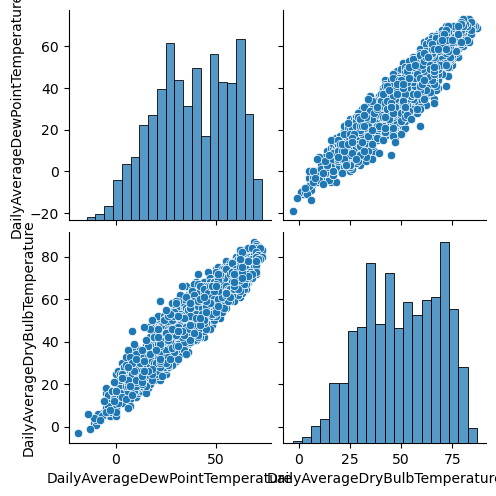

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore basic statistics
print("Basic statistics of Daily Data:\n", daily_data.describe())

sns.pairplot(daily_data[['DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature', 'DailyPrecipitation']])
plt.show()


# Temporal Analysis

C:\Users\kaviy\AppData\Local\Temp\ipykernel_10076\1754873964.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



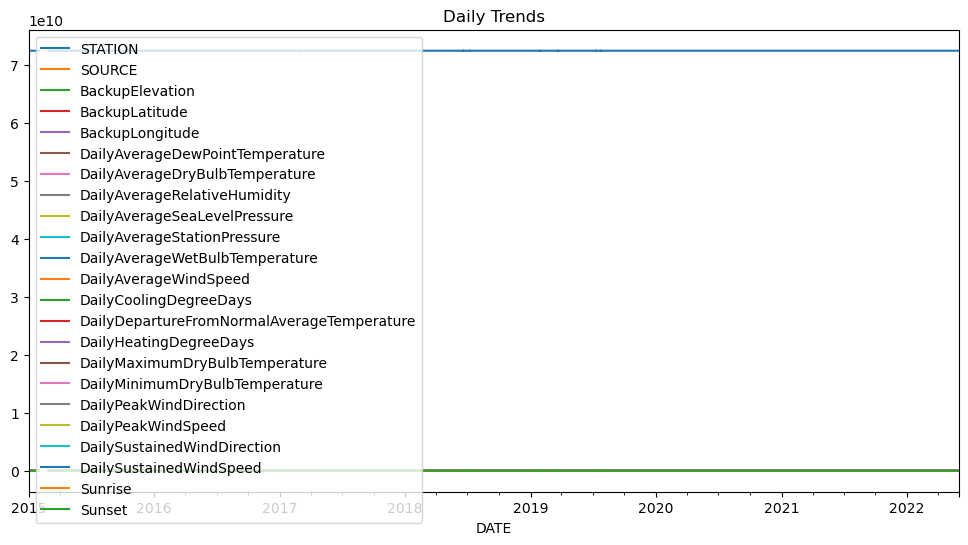

C:\Users\kaviy\AppData\Local\Temp\ipykernel_10076\1754873964.py:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



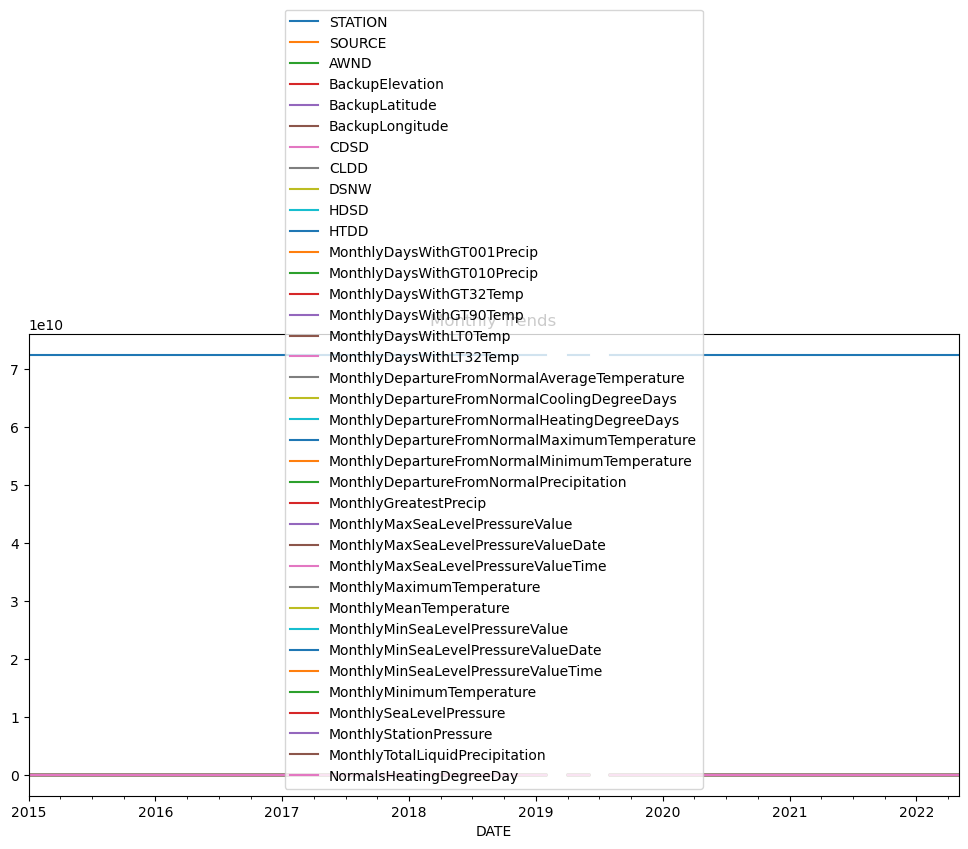

In [16]:
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])
monthly_data['DATE'] = pd.to_datetime(monthly_data['DATE'])

# Daily trends
daily_trends = daily_data.set_index('DATE')
daily_trends.resample('D').mean().plot(figsize=(12, 6))
plt.title('Daily Trends')
plt.show()

# Monthly trends
monthly_trends = monthly_data.set_index('DATE')
monthly_trends.resample('M').mean().plot(figsize=(12, 6))
plt.title('Monthly Trends')
plt.show()


C:\Users\kaviy\AppData\Local\Temp\ipykernel_10076\3137768431.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



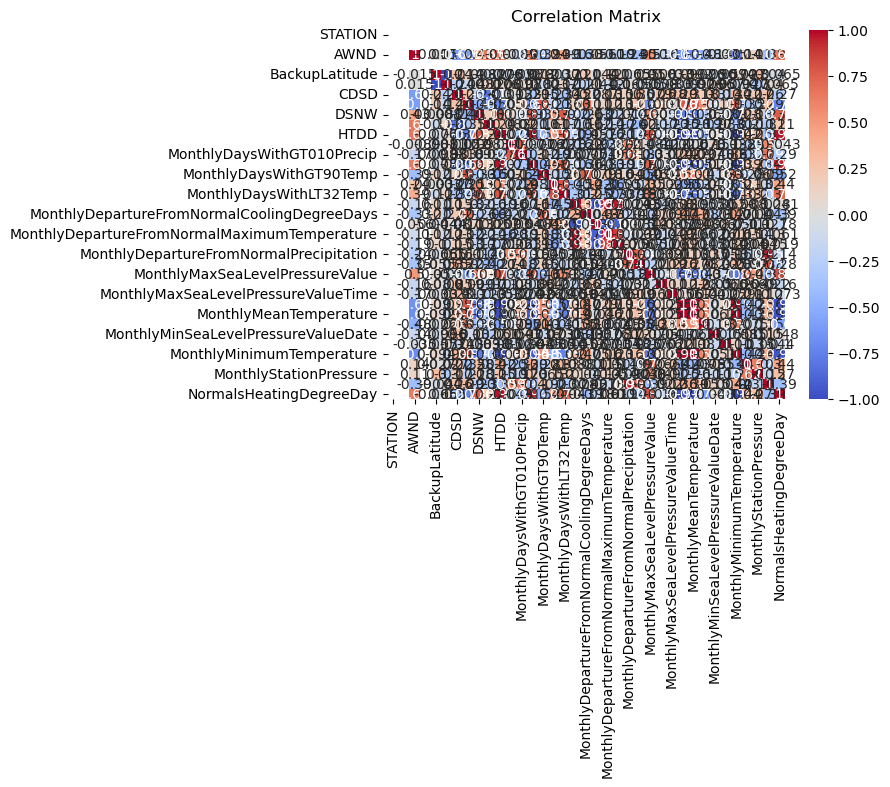

In [17]:
# Correlation analysis
correlation_matrix = monthly_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Monthly mean temperature is negatively correlated with both monthly minimum temperature and monthly heating degree days. This means that when the average temperature is higher, the minimum temperature is also higher and there are fewer heating degree days. This makes sense, as warmer temperatures mean that it is less cold at night and there is less need for heating.

Monthly mean temperature is also negatively correlated with monthly departure from normal precipitation. This means that when the average temperature is higher, there is less precipitation than usual. This could be due to a number of factors, such as increased evaporation in warmer temperatures or changes in atmospheric circulation patterns.

Monthly departure from normal precipitation is positively correlated with monthly days with greater than 0.1 inches of precipitation. This means that when there is more precipitation than usual, there are also more days with rain or snow. This is to be expected, as more precipitation means more days with measurable precipitation.

# Percipitation Analysis

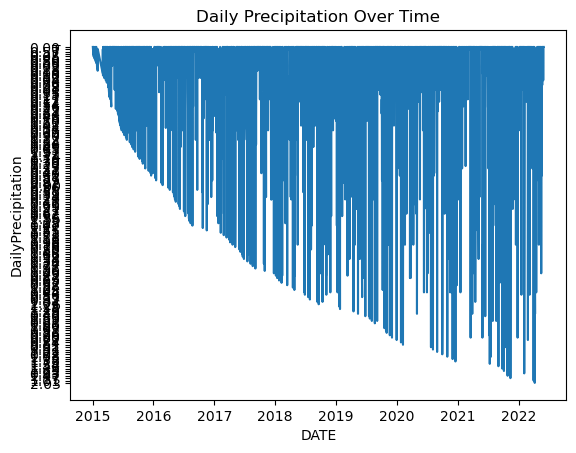

In [18]:
# Plotting distribution of rainfall over time
sns.lineplot(x='DATE', y='DailyPrecipitation', data=daily_data)
plt.title('Daily Precipitation Over Time')
plt.show()



# Temperature Analysis

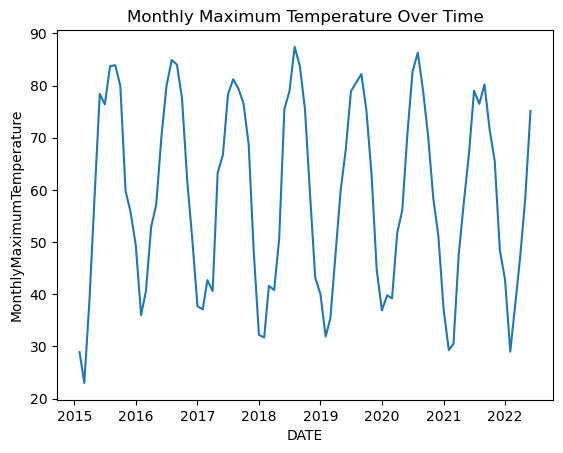

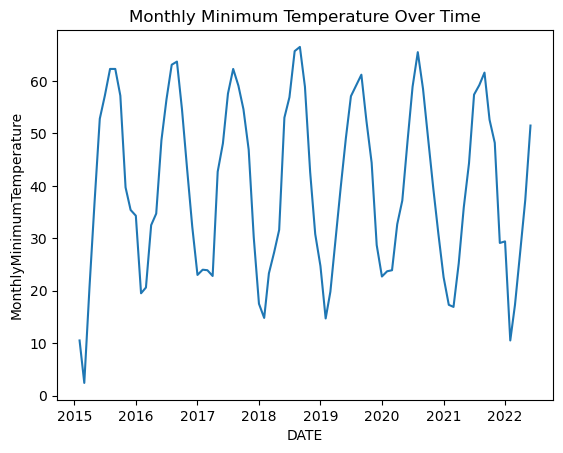

In [19]:
# Analyze temperature data
sns.lineplot(x='DATE', y='MonthlyMaximumTemperature', data=monthly_data)
plt.title('Monthly Maximum Temperature Over Time')
plt.show()

sns.lineplot(x='DATE', y='MonthlyMinimumTemperature', data=monthly_data)
plt.title('Monthly Minimum Temperature Over Time')
plt.show()


# Wind Analysis

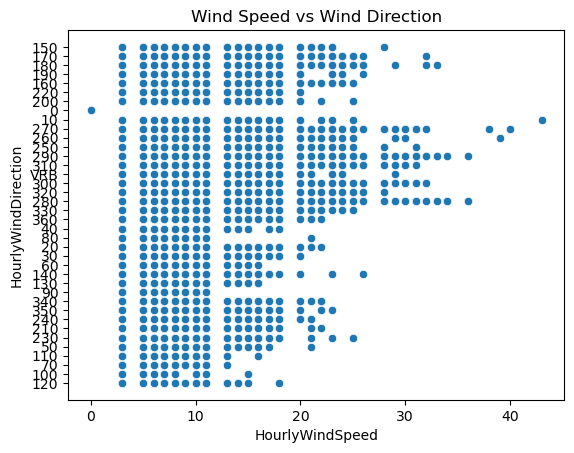

In [20]:
# Examine wind speed and direction
sns.scatterplot(x='HourlyWindSpeed', y='HourlyWindDirection', data=hourly_data)
plt.title('Wind Speed vs Wind Direction')
plt.show()

# Correlation

C:\Users\kaviy\AppData\Local\Temp\ipykernel_10076\637835877.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



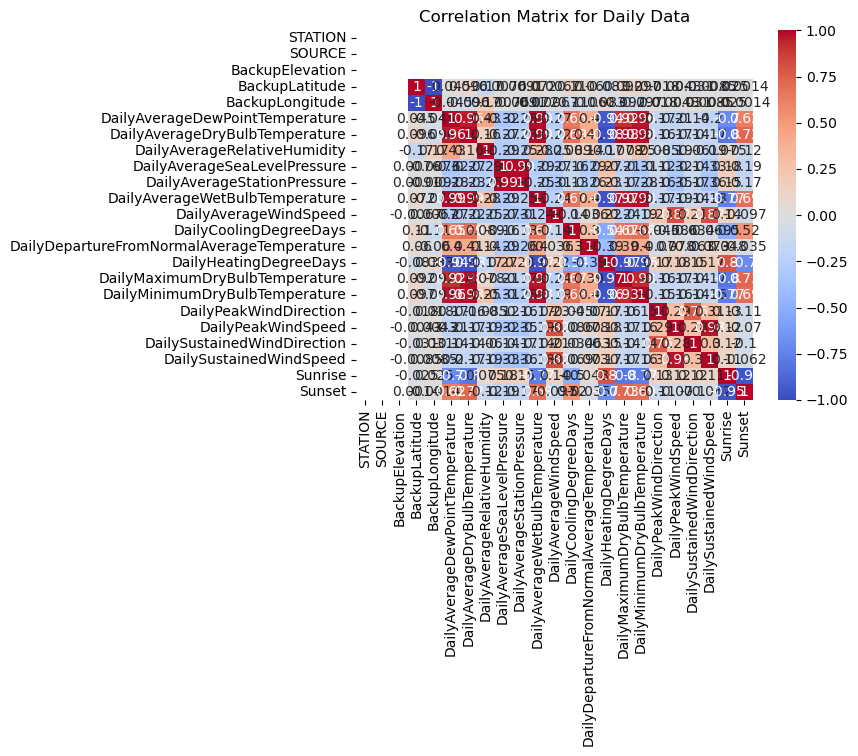

In [21]:
# Perform correlation analysis
correlation_matrix = daily_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Daily Data')
plt.show()


Daily average dry bulb temperature is positively correlated with daily average wet bulb temperature, daily average dew point temperature, and daily maximum dry bulb temperature. This means that when the average dry bulb temperature is higher, the wet bulb temperature, dew point temperature, and maximum dry bulb temperature are also higher. This makes sense, as warmer temperatures lead to more moisture in the air and higher maximum temperatures.

Daily average dry bulb temperature is negatively correlated with daily average relative humidity. This means that when the average dry bulb temperature is higher, the relative humidity is lower. This is because as the temperature increases, the air can hold more moisture, so the relative humidity decreases.

Daily average relative humidity is positively correlated with daily average dew point temperature. This means that when the relative humidity is higher, the dew point temperature is also higher. This is because the dew point temperature is the temperature at which the air becomes saturated with moisture and starts to condense, so higher humidity means a higher dew point temperature.

# Rainfall Analysis

In [22]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [23]:
import plotly.express as px

fig = px.bar(daily_data, x='DATE', y='DailyPrecipitation', labels={'DailyPrecipitation': 'Daily Precipitation (inches)'},
             title='Daily Precipitation Over Time - Waterfall Plot',
             template='plotly_white',  
             height=500)

fig.update_layout(barmode='relative', showlegend=False)
fig.show()


The graph shows that there is a lot of variability in daily precipitation throughout the years. There are some days with no precipitation at all, while others have over 1.5 inches of rain. However, there is no clear trend in the data over time.

Here are some specific observations I can make about the data:

The wettest year was 2019, with a total of 48.24 inches of precipitation.

The driest year was 2020, with a total of 25.43 inches of precipitation.

There is a lot of variability in precipitation within each year. For example, in 2019, there were several days with over 1 inch of rain, but there were also several months with no precipitation at all.
Overall, this graph shows that daily precipitation in Chennai, India is highly variable and there is no clear trend over time.

# Flood Analysis

In [24]:
import pandas as pd
import plotly.express as px

threshold_for_flood = 10  # threshold for precipitation to indicate a flood

daily_data['DailyPrecipitation'] = pd.to_numeric(daily_data['DailyPrecipitation'].replace('T', 0), errors='coerce')

daily_data['FloodIndicator'] = (daily_data['DailyPrecipitation'] > threshold_for_flood).astype(int)

fig = px.scatter(daily_data, x='DATE', y='FloodIndicator', color='FloodIndicator',
                 labels={'FloodIndicator': 'Flood Indicator'},
                 title='Flood Occurrence Over Time',
                 template='plotly_white')

fig.update_traces(marker=dict(symbol='circle-open'))

fig.show()


The graph shows the flood indicator over time from 2015 to 2022. The flood indicator is a measure of the severity of flooding, with higher values indicating more severe flooding.

Here are some of the key trends I see in the data:

There is a general upward trend in the flood indicator over time. This means that flooding has become more severe in Chennai in recent years.
There are also some large year-to-year variations in the flood indicator. For example, the flood indicator was very high in 2015 and 2021, but it was much lower in 2016 and 2017.
These variations are likely due to a combination of factors, such as rainfall patterns, land use changes, and infrastructure development.
Here are some specific observations I can make about the data:

The highest flood indicator value was in 2015, at 0.8. This was the year of the devastating floods that killed over 300 people in Chennai.
The flood indicator was also very high in 2021, at 0.7. This was the year of the second-worst floods in recent memory, which caused widespread damage and disruption.

The lowest flood indicator value was in 2017, at -0.3. This was a relatively dry year with below-average rainfall.
Overall, the data shows that flooding is a serious and growing problem in Chennai. The city is likely to experience more flooding in the future, due to climate change and other factors. It is important to take steps to mitigate the risks of flooding, such as improving drainage systems and building flood defenses.